## Degree study

In [1]:
import networkx as nx

# Open adjencency list file and build the directed graph
f=open("lightningAdjList.txt", 'rb')
G=nx.read_multiline_adjlist(f, create_using=nx.DiGraph)
f.close()

print("Number of nodes: " + str(G.number_of_nodes()))
print("Number of edges: " + str(G.number_of_edges()))

# Read alias file and create a pub_key -> alias dic

Number of nodes: 1647
Number of edges: 17016


### Compute average degree of the network

In [4]:





# Get list with degrees of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Get the average degree
average_degree = sum(degree_sequence)/len(degree_sequence)

print("Average degree: ", average_degree)



Average degree:  20.663023679417122


### Plot the degree distribution (unscaled)

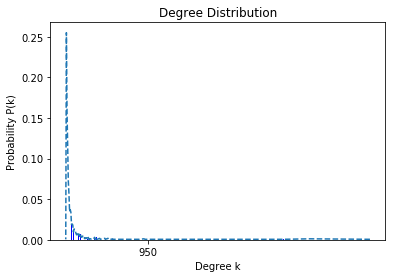

In [6]:
import matplotlib.pyplot as plt
import collections

# Dic with how much time each degree appeared
degreeCount = collections.Counter(degree_sequence)

# Separate dic into two separated tuples
deg, cnt = zip(*degreeCount.items())
cnt = list(cnt)

# Normalize cnt in cnt_norm getting %
total_sum = sum(cnt)
cnt_norm = []
for i in range(len(cnt)):
    cnt_norm += [cnt[i]/total_sum]
    
    
ax = plt.subplot()
plt.bar(deg, cnt_norm, width=0.5, color='b', tick_label=[d for d in deg])
plt.plot(deg, cnt_norm, linestyle='--')
plt.title("Degree Distribution")
plt.ylabel("Probability P(k)")
plt.xlabel("Degree k")

plt.xticks([258])

plt.show()


### Compute the gamma value of the network

In [7]:


import powerlaw as pl
        
# Fits the parameters of the distribution to the data.
fit = pl.Fit(degree_sequence)

print("Gama value of network: ", fit.alpha)



Gama value of network:  2.25982622428137


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


We conclude it is a scale free 

### Plot the power law (log scaled)

Text(0.5, 0, 'Degree k')

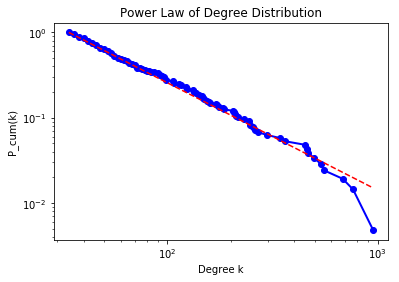

In [8]:
fig1 = fit.plot_ccdf(color = 'b', marker='o', linewidth= 2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig1)


plt.title("Power Law of Degree Distribution")
plt.ylabel("P_cum(k)")
plt.xlabel("Degree k")

Not a mesh network as some people wished. More scale-free

In [10]:
#probabillidade de um pagamento passar em funcao do tamanho da transacao